# 1. Importing Libraries and Data

In [2]:
import pandas as pd
import numpy as np
import datetime

import seaborn as sns
sns.set_style("ticks")
sns.set_palette("deep")

import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')
%matplotlib inline

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [5]:
bikes_modelling = pd.read_csv("./data/london_merged_processed.csv")

In [6]:
bikes_modelling.head()

,timestamp,count,temp,temp_feels_like,humidity,wind_speed,weather_code,season,time,day_of_week,week_of_year,month,is_holiday
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,broken_clouds,winter,00:00:00,sunday,1,january,1.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,mostly_clear,winter,01:00:00,sunday,1,january,1.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,mostly_clear,winter,02:00:00,sunday,1,january,1.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,mostly_clear,winter,03:00:00,sunday,1,january,1.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,mostly_clear,winter,04:00:00,sunday,1,january,1.0


# 2. Feature Engineering (first iteration)

### 2.1 Creating Dummy Variables

In [38]:
bikes_modelling = pd.get_dummies(bikes, columns=['weather_code', 'season', 'time', 'day_of_week', 'month'])

In [40]:
bikes_modelling.columns

Index(['timestamp', 'count', 'temp', 'temp_feels_like', 'humidity',
       'wind_speed', 'week_of_year', 'is_holiday',
       'weather_code_broken_clouds', 'weather_code_cloudy',
       'weather_code_few_clouds', 'weather_code_mostly_clear',
       'weather_code_rain', 'weather_code_rain_with_thunderstorm',
       'weather_code_snowfall', 'season_fall', 'season_spring',
       'season_summer', 'season_winter', 'time_00:00:00', 'time_01:00:00',
       'time_02:00:00', 'time_03:00:00', 'time_04:00:00', 'time_05:00:00',
       'time_06:00:00', 'time_07:00:00', 'time_08:00:00', 'time_09:00:00',
       'time_10:00:00', 'time_11:00:00', 'time_12:00:00', 'time_13:00:00',
       'time_14:00:00', 'time_15:00:00', 'time_16:00:00', 'time_17:00:00',
       'time_18:00:00', 'time_19:00:00', 'time_20:00:00', 'time_21:00:00',
       'time_22:00:00', 'time_23:00:00', 'day_of_week_friday',
       'day_of_week_monday', 'day_of_week_saturday', 'day_of_week_sunday',
       'day_of_week_thursday', 'day_of_

In [47]:
bikes_modelling.drop(columns=['temp_feels_like'], inplace=True)

### 2.2 Data Types and Indexing

In [41]:
bikes_modelling.dtypes

timestamp           object
count                int64
temp               float64
temp_feels_like    float64
humidity           float64
                    ...   
month_march          uint8
month_may            uint8
month_november       uint8
month_october        uint8
month_september      uint8
Length: 62, dtype: object

In [42]:
bikes_modelling['timestamp'] = pd.to_datetime(bikes_modelling['timestamp'])

In [43]:
bikes_modelling.dtypes

timestamp          datetime64[ns]
count                       int64
temp                      float64
temp_feels_like           float64
humidity                  float64
                        ...      
month_march                 uint8
month_may                   uint8
month_november              uint8
month_october               uint8
month_september             uint8
Length: 62, dtype: object

In [45]:
bikes_modelling.set_index('timestamp', inplace=True)

### 2.3 Fixing Abnormalities

In [162]:
bikes_modelling['count'].min()

0

In [150]:
bikes_modelling[bikes_modelling['count'] == 0]

,count,temp,humidity,wind_speed,week_of_year,is_holiday,weather_code_broken_clouds,weather_code_cloudy,weather_code_few_clouds,weather_code_mostly_clear,...,month_december,month_february,month_january,month_july,month_june,month_march,month_may,month_november,month_october,month_september
timestamp,,,,,,,,,,,,,,,,,,,,,
2015-03-29 01:00:00,0,10.5,77.0,33.0,13,1.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [192]:
bikes_modelling.loc['2015-03-29']['count']

timestamp
2015-03-29 00:00:00    395
2015-03-29 01:00:00      0
2015-03-29 03:00:00    282
2015-03-29 04:00:00    216
2015-03-29 05:00:00    112
2015-03-29 06:00:00    101
2015-03-29 07:00:00     98
2015-03-29 08:00:00    142
2015-03-29 09:00:00    217
2015-03-29 10:00:00    341
2015-03-29 11:00:00    505
2015-03-29 12:00:00    575
2015-03-29 13:00:00    392
2015-03-29 14:00:00    699
2015-03-29 15:00:00    856
2015-03-29 16:00:00    548
2015-03-29 17:00:00    875
2015-03-29 18:00:00    839
2015-03-29 19:00:00    335
2015-03-29 20:00:00    341
2015-03-29 21:00:00    278
2015-03-29 22:00:00    225
2015-03-29 23:00:00    220
Name: count, dtype: int64

In [194]:
bikes_modelling.loc['2015-03-29 00:00:00']['count'], bikes_modelling.loc['2015-03-29 03:00:00']['count']

(395.0, 282.0)

In [197]:
mean_value = (bikes_modelling.loc['2015-03-29 00:00:00']['count'] + bikes_modelling.loc['2015-03-29 03:00:00']['count']) / 2
mean_value

338.5

In [198]:
bikes_modelling['count'].replace({0 : mean_value}, inplace=True)

# 3. Modelling (first iteration)

### 3.1 Initial Statistics

In [200]:
y = bikes_modelling['count']
X = bikes_modelling.drop(columns=['count'])

In [201]:
X = sm.add_constant(X)

In [202]:
starting_model = sm.OLS(y, X)

In [203]:
results = starting_model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     866.8
Date:                Mon, 18 May 2020   Prob (F-statistic):               0.00
Time:                        05:32:28   Log-Likelihood:            -1.3540e+05
No. Observations:               17414   AIC:                         2.709e+05
Df Residuals:                   17362   BIC:                         2.713e+05
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

Important statistics in the OLS regression results:

- Adj. R-squared:   0.717
- F-statistic:      866.8

### 3.2 Train-Test Split

In [204]:
test_set = [1000, 1500, 2000, 2500, 3000, 3500, 4000]

for obs in test_set:

    print('------------------------------')
    print('{:,} observations would mean:\n'.format(obs))
    print('{:.2%} of the data'.format(obs/len(bikes)))
    print('{:,d} hours'.format(obs))
    print('{:.2f} days'.format((obs)/24))
    print('{:.2f} weeks'.format(((obs)/24)/7))
    print('{:.2f} months\n'.format((((obs)/24)/7)/4))

------------------------------
1,000 observations would mean:

5.74% of the data
1,000 hours
41.67 days
5.95 weeks
1.49 months

------------------------------
1,500 observations would mean:

8.61% of the data
1,500 hours
62.50 days
8.93 weeks
2.23 months

------------------------------
2,000 observations would mean:

11.49% of the data
2,000 hours
83.33 days
11.90 weeks
2.98 months

------------------------------
2,500 observations would mean:

14.36% of the data
2,500 hours
104.17 days
14.88 weeks
3.72 months

------------------------------
3,000 observations would mean:

17.23% of the data
3,000 hours
125.00 days
17.86 weeks
4.46 months

------------------------------
3,500 observations would mean:

20.10% of the data
3,500 hours
145.83 days
20.83 weeks
5.21 months

------------------------------
4,000 observations would mean:

22.97% of the data
4,000 hours
166.67 days
23.81 weeks
5.95 months



I have decided to use 2,500 observations for the testing sample, which is close to 15% of the data.

In [205]:
print("Total Observations = {:,}".format(len(bikes_modelling)))
print("Train set = {:,}".format(len(bikes_modelling)-2500))
print("Test set = 2,500")

Total Observations = 17,414
Train set = 14,914
Test set = 2,500


In [206]:
y = bikes_modelling['count']
X = bikes_modelling.drop(columns=(['count']))

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=2500, random_state=42)

In [208]:
len(X_train), len(X_test)

(14914, 2500)

### 3.3 Statistical Models

#### 3.3.1 Linear Regression Model (baseline)

In [209]:
linear_baseline_train_r_squared_list = []
linear_baseline_test_r_squared_list = []
linear_baseline_num_features = []

model_linear_baseline = LinearRegression()

kf = KFold(n_splits=5)

model_scores = cross_validate(model_linear_baseline,
                              X_train,
                              y_train,
                              scoring='r2',
                              cv=kf,
                              return_train_score=True)

linear_baseline_train_r_squared_list.append(model_scores['train_score'].mean())
linear_baseline_test_r_squared_list.append(model_scores['test_score'].mean())

model_linear_baseline.fit(X_train, y_train)
linear_baseline_num_features.append(len(model_linear_baseline.coef_))

df_linear = pd.DataFrame()
df_linear['Train R-squared'] = linear_baseline_train_r_squared_list
df_linear['Test R-squared'] = linear_baseline_test_r_squared_list
df_linear['Difference'] = df_linear['Train R-squared'] - df_linear['Test R-squared']
df_linear['Number of Features'] = linear_baseline_num_features
df_linear

,Train R-squared,Test R-squared,Difference,Number of Features
0,0.717622,0.714894,0.002728,59


In [210]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)

#### 3.3.2 Lasso Regression Model

In [229]:
alpha_list = []
lasso_train_r_squared_list = []
lasso_test_r_squared_list = []
lasso_num_features = []

for alpha in (1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1):
    
    model_lasso = Lasso(alpha=alpha, max_iter=5000)
    
    model_scores = cross_validate(model_lasso,
                                  X_train_s,
                                  y_train,
                                  scoring='r2',
                                  cv=kf,
                                  return_train_score=True)
    
    alpha_list.append(alpha)
    lasso_train_r_squared_list.append(model_scores['train_score'].mean())
    lasso_test_r_squared_list.append(model_scores['test_score'].mean())
    
    model_lasso.fit(X_train_s, y_train)
    lasso_coefficients = model_lasso.coef_
    lasso_coefficients  = lasso_coefficients[lasso_coefficients!=0]
    lasso_num_features.append(len(lasso_coefficients))
                                     
df_lasso = pd.DataFrame()
df_lasso['Alpha'] = alpha_list
df_lasso['Train R-squared'] = lasso_train_r_squared_list
df_lasso['Test R-squared'] = lasso_test_r_squared_list
df_lasso['Difference'] = df_lasso['Train R-squared'] - df_lasso['Test R-squared']
df_lasso['Number of Features'] = lasso_num_features
df_lasso

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33.81674810147297, tolerance: 1.95198480163235
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31.05086019912369, tolerance: 1.9471460887571208
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34.134850277456735, tolerance: 1.9650391700022765
  model = cd_fast.enet_coordinate_descent(
/L

,Alpha,Train R-squared,Test R-squared,Difference,Number of Features
0,0.00001,0.834040,0.832460,0.001580,56
1,0.00010,0.834039,0.832458,0.001580,52
2,0.00100,0.833899,0.832308,0.001591,52
3,0.01000,0.830084,0.828666,0.001418,44
4,0.10000,0.716323,0.715280,0.001042,16
5,1.00000,0.000000,-0.000291,0.000291,0
6,10.00000,0.000000,-0.000291,0.000291,0


#### 3.3.3 Ridge Regression Model

In [212]:
alpha_list = []
ridge_train_r_squared_list = []
ridge_test_r_squared_list = []
ridge_num_features = []

for alpha in (1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4, 1e5):
    
    model_ridge = Ridge(alpha=alpha, max_iter=5000)
    
    model_scores = cross_validate(model_ridge,
                                  X_train_s,
                                  y_train,
                                  scoring='r2',
                                  cv=kf,
                                  return_train_score=True)
    
    alpha_list.append(alpha)
    ridge_train_r_squared_list.append(model_scores['train_score'].mean())
    ridge_test_r_squared_list.append(model_scores['test_score'].mean())
    
    model_ridge.fit(X_train_s, y_train)
    ridge_coefficients = model_ridge.coef_
    ridge_coefficients  = ridge_coefficients[ridge_coefficients!=0]
    ridge_num_features.append(len(ridge_coefficients))
                                     
df_ridge = pd.DataFrame()
df_ridge['Alpha'] = alpha_list
df_ridge['Train R-squared'] = ridge_train_r_squared_list
df_ridge['Test R-squared'] = ridge_test_r_squared_list
df_ridge['Difference'] = df_ridge['Train R-squared'] - df_ridge['Test R-squared']
df_ridge['Number of Features'] = ridge_num_features
df_ridge

,Alpha,Train R-squared,Test R-squared,Difference,Number of Features
0,0.00001,0.717622,0.714893,0.002729,59
1,0.00010,0.717622,0.714893,0.002729,59
2,0.00100,0.717622,0.714893,0.002729,59
3,0.01000,0.717622,0.714893,0.002729,59
4,0.10000,0.717622,0.714893,0.002729,59
5,1.00000,0.717622,0.714893,0.002728,59
6,10.00000,0.717621,0.714895,0.002726,59
7,100.00000,0.717558,0.714857,0.002701,59
8,1000.00000,0.714029,0.711476,0.002553,59
9,10000.00000,0.609756,0.607557,0.002199,59


#### 3.3.4 ElasticNet Regression Model

In [213]:
alpha_list = []
elastic_train_r_squared_list = []
elastic_test_r_squared_list = []
elastic_num_features = []

for alpha in (1e-5, 1e-3, 1e-1, 1, 1e1, 1e3):
    
    model_elastic = ElasticNet(alpha=alpha, max_iter=5000)
    
    model_scores = cross_validate(model_elastic,
                                  X_train_s,
                                  y_train,
                                  scoring='r2',
                                  cv=kf,
                                  return_train_score=True)
    
    alpha_list.append(alpha)
    elastic_train_r_squared_list.append(model_scores['train_score'].mean())
    elastic_test_r_squared_list.append(model_scores['test_score'].mean())
    
    model_elastic.fit(X_train_s, y_train)
    elastic_coefficients = model_elastic.coef_
    elastic_coefficients  = elastic_coefficients[elastic_coefficients!=0]
    elastic_num_features.append(len(elastic_coefficients))
                                     
df_elastic = pd.DataFrame()
df_elastic['Alpha'] = alpha_list
df_elastic['Train R-squared'] = elastic_train_r_squared_list
df_elastic['Test R-squared'] = elastic_test_r_squared_list
df_elastic['Difference'] = df_elastic['Train R-squared'] - df_elastic['Test R-squared']
df_elastic['Number of Features'] = elastic_num_features
df_elastic

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1953854399.3466067, tolerance: 1394908.771483635
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1867655941.7359962, tolerance: 1382626.0934211381
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1938196339.9180312, tolerance: 1414508.3692055861
  model = cd_fast.enet_coordinate_descent(

,Alpha,Train R-squared,Test R-squared,Difference,Number of Features
0,0.00001,0.717622,0.714893,0.002729,59
1,0.00100,0.717621,0.714895,0.002727,58
2,0.10000,0.716100,0.713495,0.002605,59
3,1.00000,0.659722,0.657429,0.002293,59
4,10.00000,0.293769,0.292391,0.001378,59
5,1000.00000,0.000010,-0.000297,0.000308,1


### 3.4 Comparing the Models

In [214]:
models = ['Linear',
         'Lasso (alpha = 0.1)',
         'Ridge (alpha = 1)',
         'ElasticNet (alpha = 0.001)']

In [215]:
df_models = df_linear
df_models.loc[df_lasso.index[1]] = df_lasso.iloc[2]
df_models.loc[df_ridge.index[2]] = df_ridge.iloc[5]
df_models.loc[df_elastic.index[3]] = df_elastic.iloc[1]
df_models.insert(0, 'Models', models)
df_models

,Models,Train R-squared,Test R-squared,Difference,Number of Features
0,Linear,0.717622,0.714894,0.002728,59.0
1,Lasso (alpha = 0.1),0.717620,0.714898,0.002721,52.0
2,Ridge (alpha = 1),0.717622,0.714893,0.002728,59.0
3,ElasticNet (alpha = 0.001),0.717621,0.714895,0.002727,58.0


# 4. Predictions (first iteration)

In [216]:
scaler = StandardScaler()
X_test_s = scaler.fit_transform(X_test)

In [217]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_test_s, y_test)

test_r_squared = lasso.score(X_test_s, y_test)
print("The R-squared for the Lasso Model on the test set is {:}".format(test_r_squared))

The R-squared for the Lasso Model on the test set is 0.7273011503913911


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4511558.652990818, tolerance: 302753.0099783601
  model = cd_fast.enet_coordinate_descent(


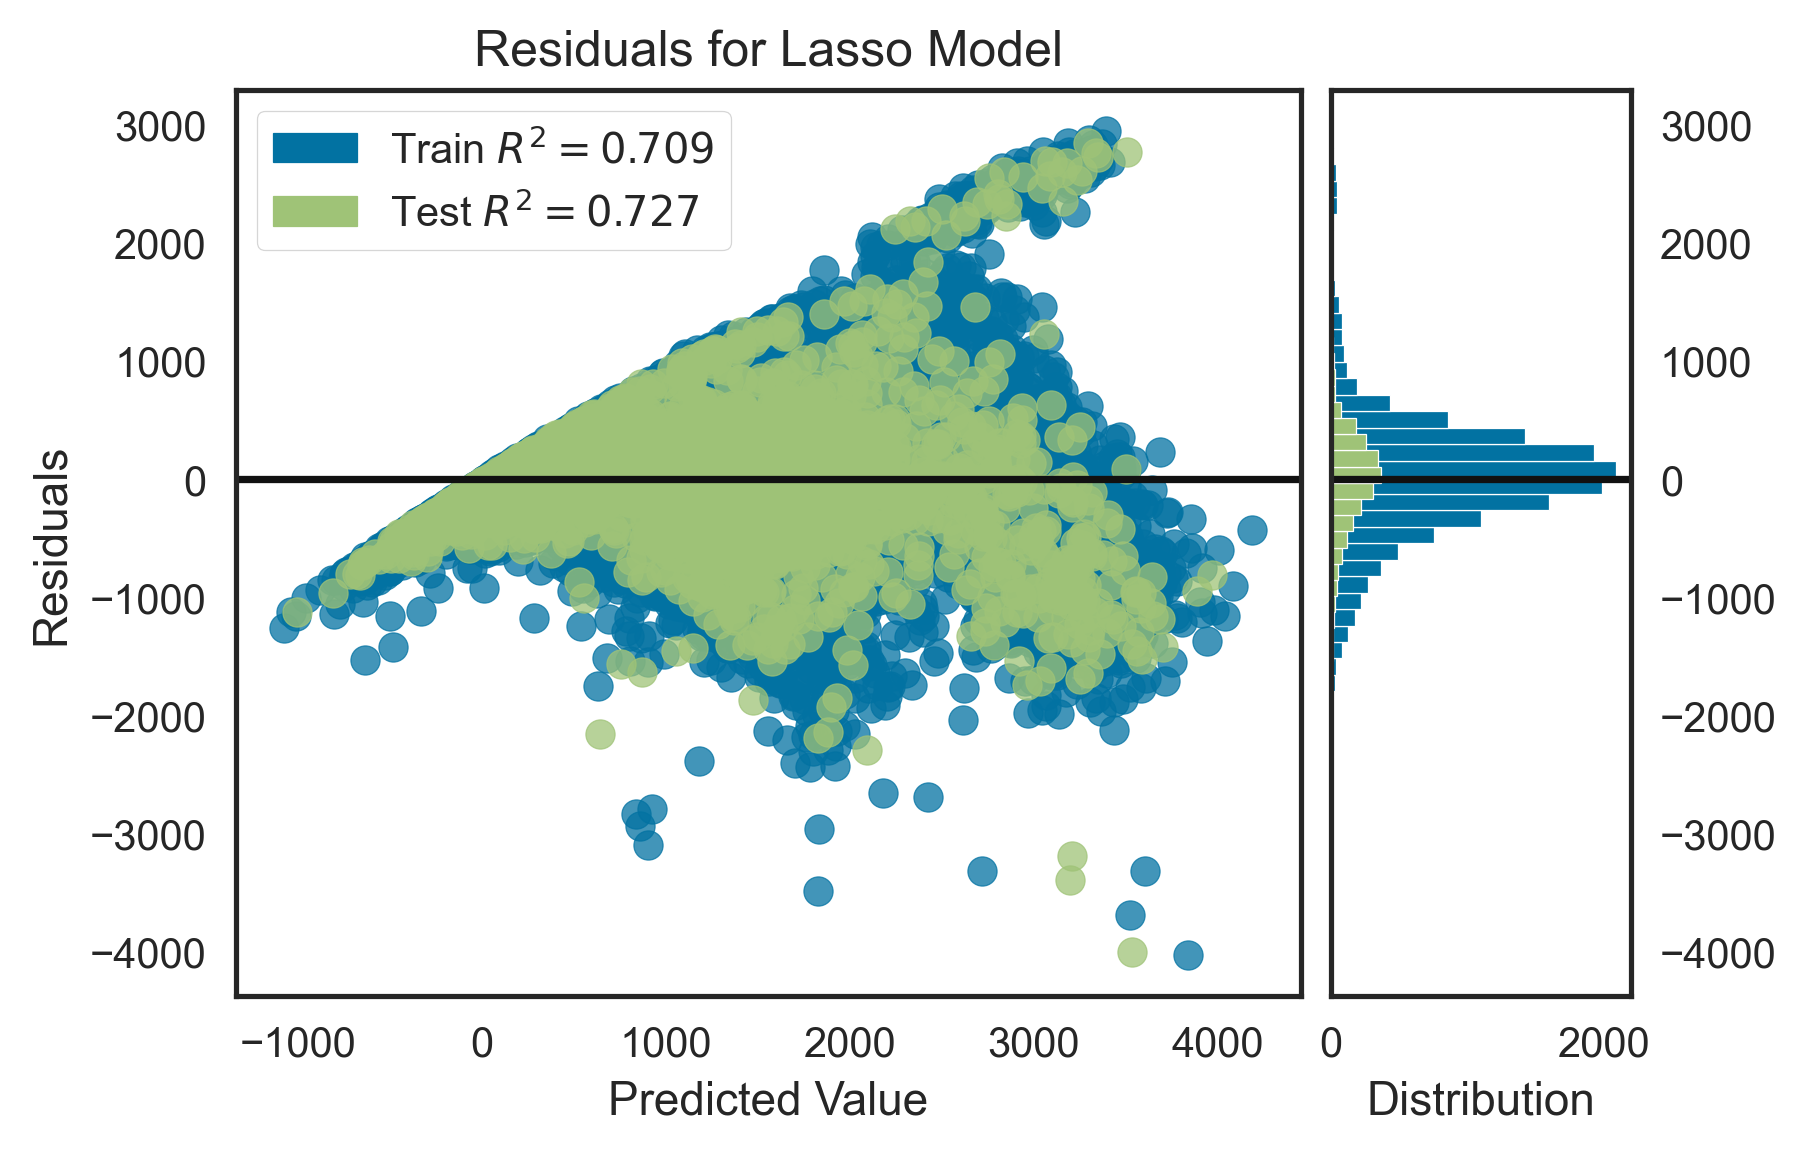

In [218]:
plt.figure(dpi=300)

visualiser = ResidualsPlot(lasso)

visualiser.fit(X_train_s, y_train)
visualiser.score(X_test_s, y_test)
visualiser.show()
fig = plt.show()

# 5. Feature Engineering (second iteration)

In [219]:
bikes_modelling_log = bikes_modelling.copy()

In [220]:
bikes_modelling_log['count_log'] = np.log(bikes_modelling_log['count'])

In [221]:
bikes_modelling_log.head()

,count,temp,humidity,wind_speed,week_of_year,is_holiday,weather_code_broken_clouds,weather_code_cloudy,weather_code_few_clouds,weather_code_mostly_clear,...,month_february,month_january,month_july,month_june,month_march,month_may,month_november,month_october,month_september,count_log
timestamp,,,,,,,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182.0,3.0,93.0,6.0,1,1.0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,5.204007
2015-01-04 01:00:00,138.0,3.0,93.0,5.0,1,1.0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,4.927254
2015-01-04 02:00:00,134.0,2.5,96.5,0.0,1,1.0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,4.897840
2015-01-04 03:00:00,72.0,2.0,100.0,0.0,1,1.0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,4.276666
2015-01-04 04:00:00,47.0,2.0,93.0,6.5,1,1.0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,3.850148


In [224]:
bikes_modelling_log.drop(columns=['count'], inplace=True)

In [225]:
y = bikes_modelling_log['count_log']
X = bikes_modelling_log.drop(columns=['count_log'])

# 6. Modelling (second iteration)

### 6.1 Train-Test Split

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=2500, random_state=42)

### 6.2 Statistical Models

#### 6.2.1 Linear Regression Model (baseline)

In [227]:
linear_baseline_train_r_squared_list = []
linear_baseline_test_r_squared_list = []
linear_baseline_num_features = []

model_linear_baseline = LinearRegression()

kf = KFold(n_splits=5)

model_scores = cross_validate(model_linear_baseline,
                              X_train,
                              y_train,
                              scoring='r2',
                              cv=kf,
                              return_train_score=True)

linear_baseline_train_r_squared_list.append(model_scores['train_score'].mean())
linear_baseline_test_r_squared_list.append(model_scores['test_score'].mean())

model_linear_baseline.fit(X_train, y_train)
linear_baseline_num_features.append(len(model_linear_baseline.coef_))

df_linear = pd.DataFrame()
df_linear['Train R-squared'] = linear_baseline_train_r_squared_list
df_linear['Test R-squared'] = linear_baseline_test_r_squared_list
df_linear['Difference'] = df_linear['Train R-squared'] - df_linear['Test R-squared']
df_linear['Number of Features'] = linear_baseline_num_features
df_linear

,Train R-squared,Test R-squared,Difference,Number of Features
0,0.83404,0.832461,0.001579,59


#### 6.2.2 Lasso Regression Model

In [228]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)

In [230]:
alpha_list = []
lasso_train_r_squared_list = []
lasso_test_r_squared_list = []
lasso_num_features = []

for alpha in (1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1):
    
    model_lasso = Lasso(alpha=alpha, max_iter=5000)
    
    model_scores = cross_validate(model_lasso,
                                  X_train_s,
                                  y_train,
                                  scoring='r2',
                                  cv=kf,
                                  return_train_score=True)
    
    alpha_list.append(alpha)
    lasso_train_r_squared_list.append(model_scores['train_score'].mean())
    lasso_test_r_squared_list.append(model_scores['test_score'].mean())
    
    model_lasso.fit(X_train_s, y_train)
    lasso_coefficients = model_lasso.coef_
    lasso_coefficients  = lasso_coefficients[lasso_coefficients!=0]
    lasso_num_features.append(len(lasso_coefficients))
                                     
df_lasso = pd.DataFrame()
df_lasso['Alpha'] = alpha_list
df_lasso['Train R-squared'] = lasso_train_r_squared_list
df_lasso['Test R-squared'] = lasso_test_r_squared_list
df_lasso['Difference'] = df_lasso['Train R-squared'] - df_lasso['Test R-squared']
df_lasso['Number of Features'] = lasso_num_features
df_lasso

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33.81674810147297, tolerance: 1.95198480163235
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31.05086019912369, tolerance: 1.9471460887571208
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34.134850277456735, tolerance: 1.9650391700022765
  model = cd_fast.enet_coordinate_descent(
/L

,Alpha,Train R-squared,Test R-squared,Difference,Number of Features
0,0.00001,0.834040,0.832460,0.001580,56
1,0.00010,0.834039,0.832458,0.001580,52
2,0.00100,0.833899,0.832308,0.001591,52
3,0.01000,0.830084,0.828666,0.001418,44
4,0.10000,0.716323,0.715280,0.001042,16
5,1.00000,0.000000,-0.000291,0.000291,0
6,10.00000,0.000000,-0.000291,0.000291,0


#### 6.2.3 Ridge Regression Model

In [231]:
alpha_list = []
ridge_train_r_squared_list = []
ridge_test_r_squared_list = []
ridge_num_features = []

for alpha in (1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4, 1e5):
    
    model_ridge = Ridge(alpha=alpha, max_iter=5000)
    
    model_scores = cross_validate(model_ridge,
                                  X_train_s,
                                  y_train,
                                  scoring='r2',
                                  cv=kf,
                                  return_train_score=True)
    
    alpha_list.append(alpha)
    ridge_train_r_squared_list.append(model_scores['train_score'].mean())
    ridge_test_r_squared_list.append(model_scores['test_score'].mean())
    
    model_ridge.fit(X_train_s, y_train)
    ridge_coefficients = model_ridge.coef_
    ridge_coefficients  = ridge_coefficients[ridge_coefficients!=0]
    ridge_num_features.append(len(ridge_coefficients))
                                     
df_ridge = pd.DataFrame()
df_ridge['Alpha'] = alpha_list
df_ridge['Train R-squared'] = ridge_train_r_squared_list
df_ridge['Test R-squared'] = ridge_test_r_squared_list
df_ridge['Difference'] = df_ridge['Train R-squared'] - df_ridge['Test R-squared']
df_ridge['Number of Features'] = ridge_num_features
df_ridge

,Alpha,Train R-squared,Test R-squared,Difference,Number of Features
0,0.00001,0.834040,0.832460,0.001580,59
1,0.00010,0.834040,0.832460,0.001580,59
2,0.00100,0.834040,0.832460,0.001580,59
3,0.01000,0.834040,0.832460,0.001580,59
4,0.10000,0.834040,0.832460,0.001580,59
5,1.00000,0.834040,0.832460,0.001580,59
6,10.00000,0.834039,0.832461,0.001578,59
7,100.00000,0.833948,0.832385,0.001563,59
8,1000.00000,0.829038,0.827559,0.001479,59
9,10000.00000,0.702884,0.701355,0.001529,59


#### 6.2.4 ElasticNet Regression Model

In [232]:
alpha_list = []
elastic_train_r_squared_list = []
elastic_test_r_squared_list = []
elastic_num_features = []

for alpha in (1e-5, 1e-3, 1e-1, 1, 1e1, 1e3):
    
    model_elastic = ElasticNet(alpha=alpha, max_iter=5000)
    
    model_scores = cross_validate(model_elastic,
                                  X_train_s,
                                  y_train,
                                  scoring='r2',
                                  cv=kf,
                                  return_train_score=True)
    
    alpha_list.append(alpha)
    elastic_train_r_squared_list.append(model_scores['train_score'].mean())
    elastic_test_r_squared_list.append(model_scores['test_score'].mean())
    
    model_elastic.fit(X_train_s, y_train)
    elastic_coefficients = model_elastic.coef_
    elastic_coefficients  = elastic_coefficients[elastic_coefficients!=0]
    elastic_num_features.append(len(elastic_coefficients))
                                     
df_elastic = pd.DataFrame()
df_elastic['Alpha'] = alpha_list
df_elastic['Train R-squared'] = elastic_train_r_squared_list
df_elastic['Test R-squared'] = elastic_test_r_squared_list
df_elastic['Difference'] = df_elastic['Train R-squared'] - df_elastic['Test R-squared']
df_elastic['Number of Features'] = elastic_num_features
df_elastic

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 107.44868493141621, tolerance: 1.95198480163235
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 104.56806082746243, tolerance: 1.9471460887571208
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 102.34981311070851, tolerance: 1.9650391700022765
  model = cd_fast.enet_coordinate_descent(


,Alpha,Train R-squared,Test R-squared,Difference,Number of Features
0,0.00001,0.834040,0.832460,0.001580,57
1,0.00100,0.833996,0.832415,0.001582,52
2,0.10000,0.780704,0.779742,0.000962,23
3,1.00000,0.061946,0.061666,0.000280,1
4,10.00000,0.000000,-0.000291,0.000291,0
5,1000.00000,0.000000,-0.000291,0.000291,0


## 6.3 Comparing the Models

In [233]:
models_2 = ['Linear',
         'Lasso (alpha = 0.0001)',
         'Ridge (alpha = 1)',
         'ElasticNet (alpha = 0.00001)']

In [234]:
df_models_2 = df_linear
df_models_2.loc[df_lasso.index[1]] = df_lasso.iloc[1]
df_models_2.loc[df_ridge.index[2]] = df_ridge.iloc[5]
df_models_2.loc[df_elastic.index[3]] = df_elastic.iloc[0]
df_models_2.insert(0, 'Models', models_2)
df_models_2

,Models,Train R-squared,Test R-squared,Difference,Number of Features
0,Linear,0.834040,0.832461,0.001579,59.0
1,Lasso (alpha = 0.0001),0.834039,0.832458,0.001580,52.0
2,Ridge (alpha = 1),0.834040,0.832460,0.001580,59.0
3,ElasticNet (alpha = 0.00001),0.834040,0.832460,0.001580,57.0


# 7. Predictions (second iteration)

In [235]:
scaler = StandardScaler()
X_test_s = scaler.fit_transform(X_test)

In [236]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_test_s, y_test)

test_r_squared = lasso.score(X_test_s, y_test)
print("The R-squared for the Lasso Model on the test set is {:}".format(test_r_squared))

The R-squared for the Lasso Model on the test set is 0.7318902278200405


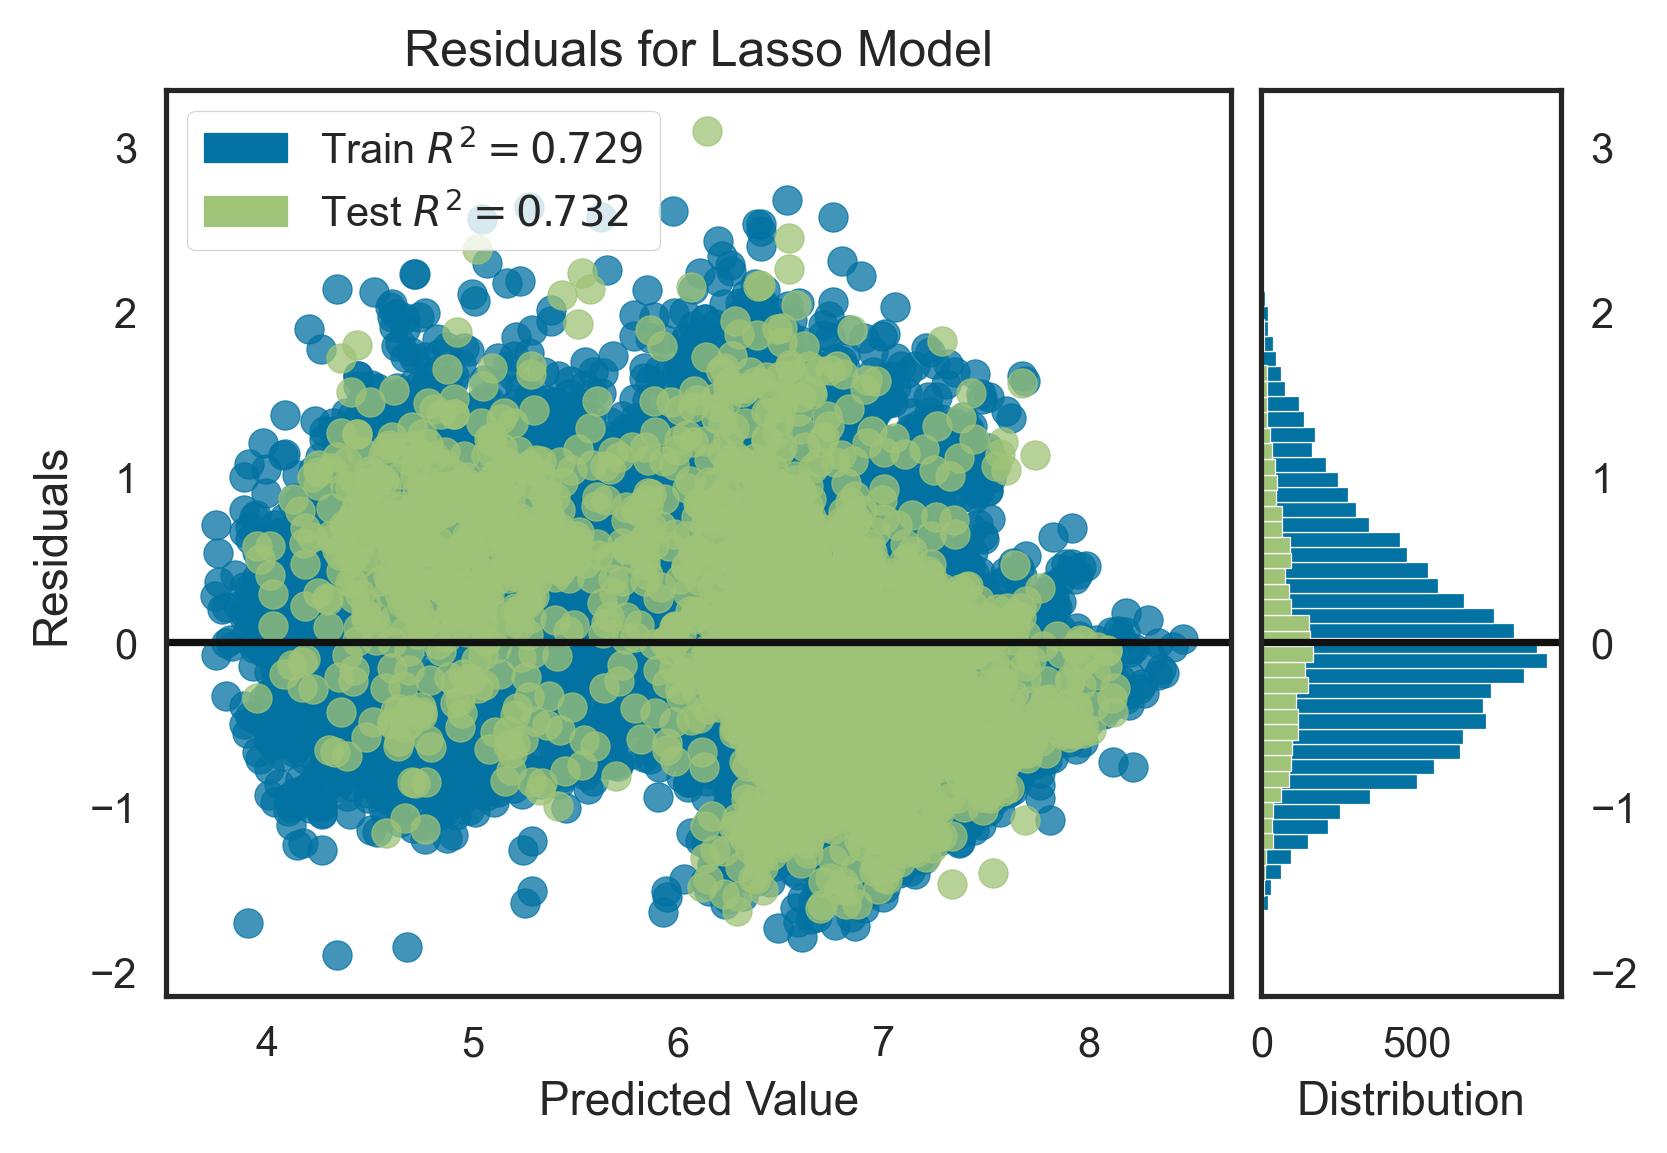

In [237]:
plt.figure(dpi=300)

visualiser = ResidualsPlot(lasso)

visualiser.fit(X_train_s, y_train)
visualiser.score(X_test_s, y_test)
visualiser.show()
fig = plt.show()